In [1]:
import numpy
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
%matplotlib inline  

import sys
sys.path.append('../../main/kernel/')
import kernelFun 
import rbfKernelApprox


n_samples = 5000
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.08)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.08)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = numpy.random.rand(n_samples, 2), None
noisy_s_curve = datasets.make_s_curve(n_samples=n_samples, noise=0.05)

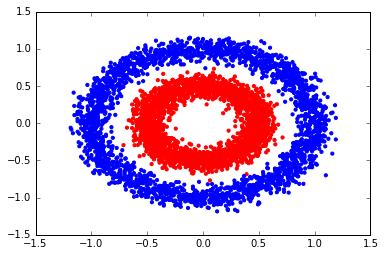

In [2]:
X = noisy_circles[0]
y = noisy_circles[1]
dataname = 'circle'

colors = numpy.array([x for x in 'brgcmykbgrcmykbgrcmykbgrcmyk'])
colors = numpy.hstack([colors] * 20)

fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], color=colors[y].tolist(), s=10)
plt.show()
fig.savefig(dataname + '.pdf', format='pdf', dpi=1200)

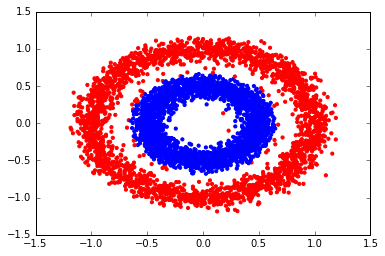

In [3]:
import sys
sys.path.append('../../main/kpca/')
import kpca 

parameters = {'method': 'FastSPSD',
             'sketch': 'Kmeans',
             'sigma': 0.15,
             'sizeSketch': 100}

numClass = 2
targetDim = 2

ypred = kpca.clusteringKPCA(X, numClass, targetDim, parameters)
plt.scatter(X[:, 0], X[:, 1], color=colors[ypred].tolist(), s=10)
plt.show()

In [13]:
import sklearn.metrics

nmi = sklearn.metrics.mutual_info_score(y, ypred)
print('NMI = ' + str(nmi))
acc = sklearn.metrics.accuracy_score(y, ypred)
print('Accuracy = ' + str(acc))


NMI = 0.657942057203
Accuracy = 0.0066


In [10]:
import sys
sys.path.append('../../main/kernel/')
import adaptiveSampling 


sigma = 0.8
matK = kernelFun.rbf(X, X, sigma)

idx1 = numpy.random.choice(n_samples, 40)
idx2 = adaptiveSampling.adaptiveSamplingRBF(X, sigma, 40)

matX1 = X[idx1, :]
matX2 = X[idx2, :]
matC1 = kernelFun.rbf(X, matX1, sigma)
matC2 = kernelFun.rbf(X, matX2, sigma)
matQ1 = numpy.linalg.qr(matC1, mode='reduced')[0]
matQ2 = numpy.linalg.qr(matC2, mode='reduced')[0]
matU1 = numpy.dot(matQ1.T, numpy.dot(matK, matQ1))
matU2 = numpy.dot(matQ2.T, numpy.dot(matK, matQ2))
err1 = numpy.linalg.norm(matK - numpy.dot(matQ1, numpy.dot(matU1, matQ1.T)), 'fro')
err2 = numpy.linalg.norm(matK - numpy.dot(matQ2, numpy.dot(matU2, matQ2.T)), 'fro')
print(err1)
print(err2)

0.0144258967882
0.0111275723839
